# 0. Import Libraries

In [1]:
!pip install tabulate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 1. Meet the Dataset

## 1.1 Explore the Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(f'input features shape: {iris.data.shape}')  
print(f'target shape: {iris.target.shape}')  

input features shape: (150, 4)
target shape: (150,)


In [6]:
# first 3 rows of the features
iris['data'][:3, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [7]:
print(f'features names: {iris.feature_names}')
print(f'target labels: {iris.target_names}')

features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target labels: ['setosa' 'versicolor' 'virginica']


## 1.2 Create a DataFrame

In [8]:
df = pd.DataFrame(data=np.c_[iris.data, iris.target],
                 columns=iris['feature_names']+['species'])

# 2. EDA

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


<Axes: xlabel='species'>

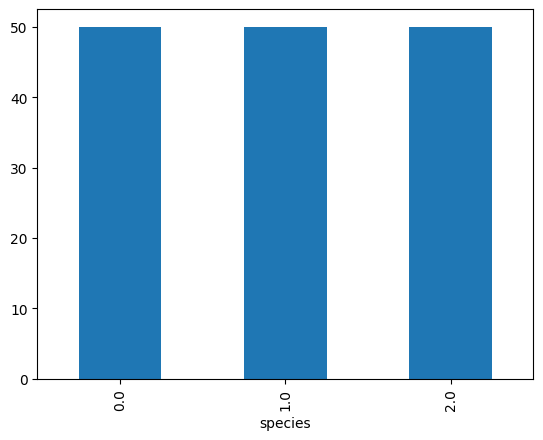

In [11]:
df['species'].value_counts().plot.bar()

As we can see the dataset is balanced. 
So, we can use accuracy metric for this task.

In [12]:
# check null values
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

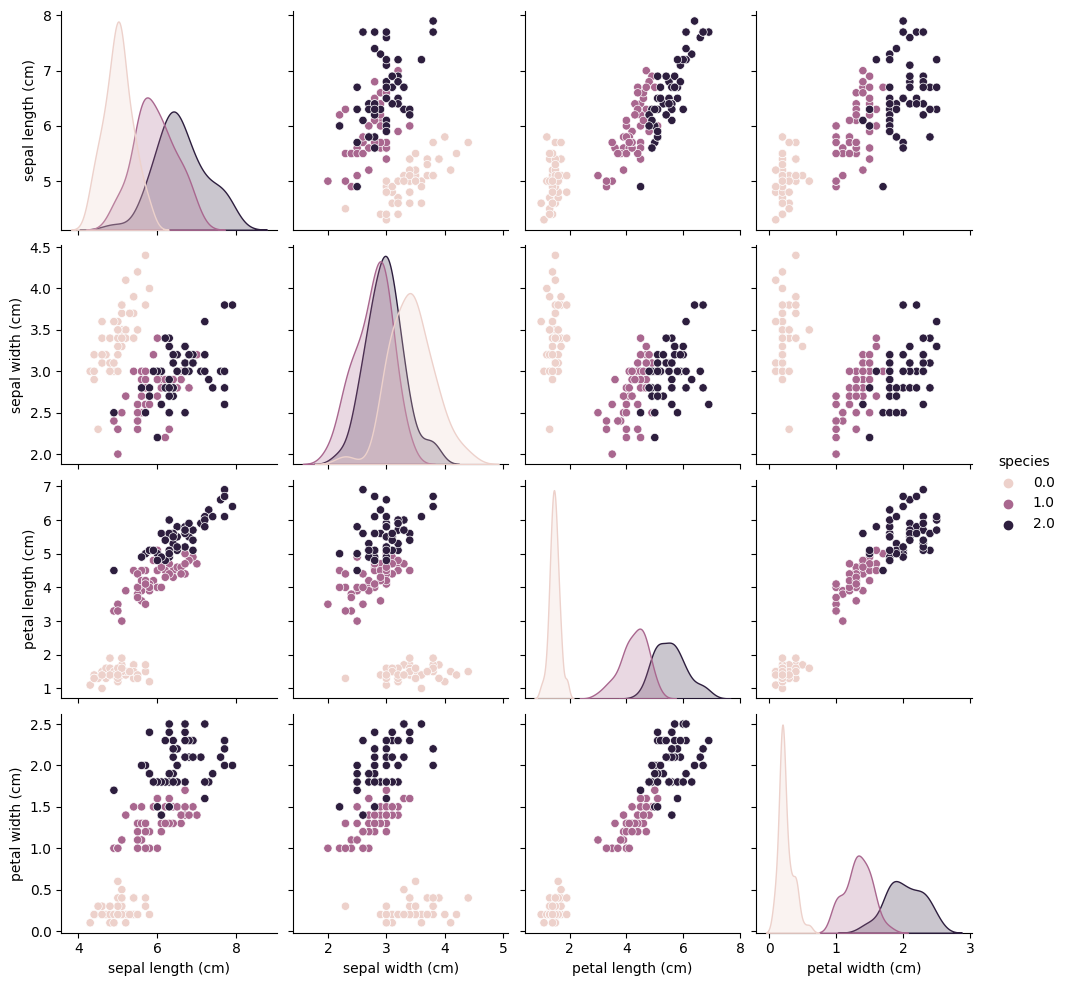

In [13]:
# see the relationship between each combination of 2 features with the target variable
sns.pairplot(df, hue='species')

The scatter plots show that we can distinguish **species 0** based on **petal length and width**, but there's a bit of overlap between the other two species. On the contrary, it is difficult to distinguish between speice 1 and 2 using only sepal length and width features.


<Axes: >

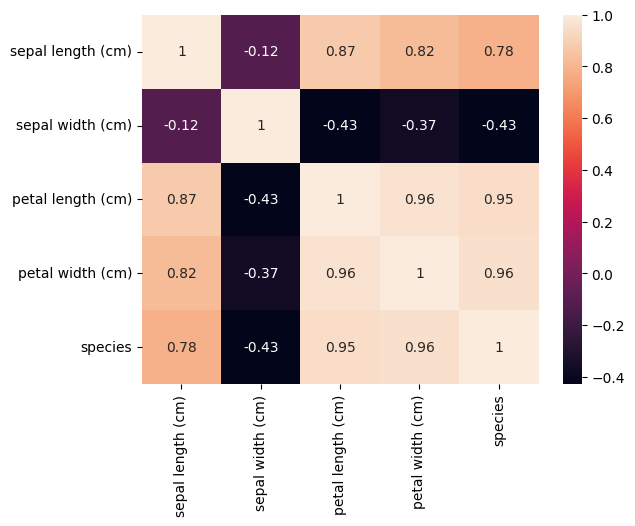

In [14]:
# see corrolation among features
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

Petal length and width exhibit a strong correlation with the species, with correlation coefficients of 0.95 and 0.96, respectively. This indicates that these two features are likely the most significant in determining the species.However, in this notebook, I will opt to work with all features since they all demonstrate relatively high correlations.

# 3. Train Test Split

In [15]:
target = 'species'
X = df.drop(columns=target)
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# 4. Modeling

In [18]:
classification_models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'xgboost': XGBClassifier(),
    'SVM': SVC()
}

In [19]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [20]:
def evaluate_models(X_train, X_test):

    results = {}

    for model_name, model in classification_models.items():
        print(model_name)

        model.fit(X_train, y_train)

        train_acc = model.score(X_train, y_train)
        y_pred = model.predict(X_test)

        
        test_acc = accuracy_score(y_test, y_pred)


        # Visualize the confusion matrix
        print('Confusion Matrix:')
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm)

        # print classification report
        print(f'classification_report :\n{classification_report(y_test, y_pred)}')
        
        # separator line
        print('-'*50)


        results[model_name] = [train_acc, test_acc]

    results_df = pd.DataFrame(results, index=['train_accuracy', 'test_accuracy']).T 
    return results_df










 Try using all features

LogisticRegression
Confusion Matrix:


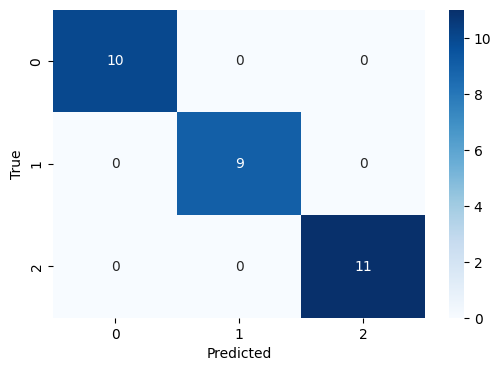

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
DecisionTree
Confusion Matrix:


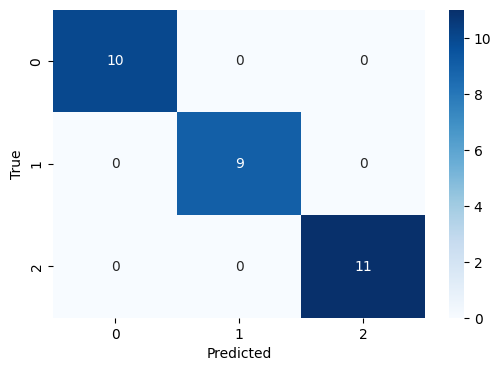

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
RandomForest
Confusion Matrix:


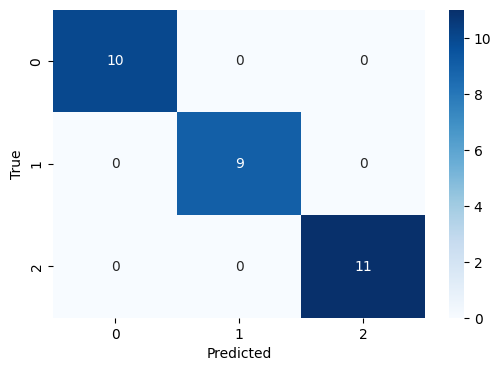

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
xgboost
Confusion Matrix:


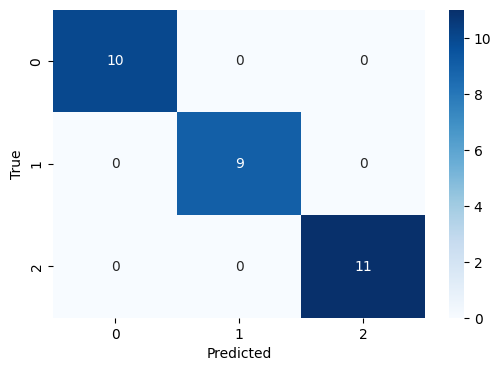

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
SVM
Confusion Matrix:


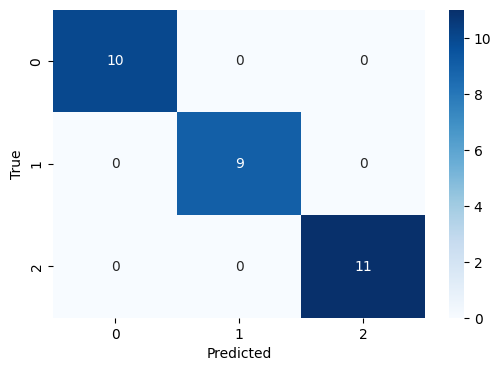

classification_report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------


In [21]:
results_df = evaluate_models(X_train, X_test)

# 5. Models Final Accuracies

In [22]:
results_df.sort_values(by='test_accuracy', ascending=False)

,train_accuracy,test_accuracy
LogisticRegression,0.975,1.0
DecisionTree,1.000,1.0
RandomForest,1.000,1.0
xgboost,1.000,1.0
SVM,0.975,1.0
